https://xgboost.readthedocs.io/en/stable/parameter.html



In [116]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample
from sklearn.metrics import matthews_corrcoef

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

import optuna

import xgboost

from sklearn.metrics import make_scorer , accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold,train_test_split

In [118]:
df = pd.read_csv('/content/credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [119]:
#df = df.drop_duplicates()

In [120]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [121]:
df.drop('Loan ID',axis=1,inplace=True)
df.drop('Customer ID',axis=1,inplace=True)

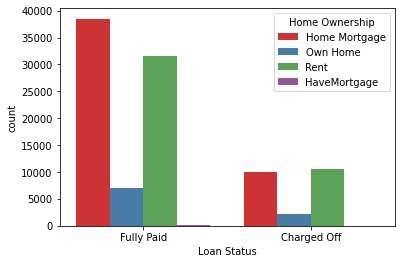

In [122]:
ax = sns.countplot(x="Loan Status", data=df,hue="Home Ownership",palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


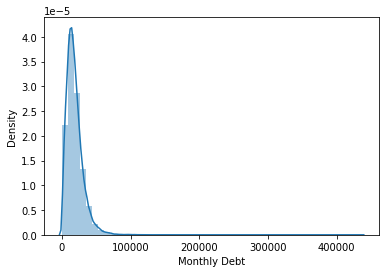

In [123]:
sns.distplot(df["Monthly Debt"])

In [124]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [125]:
df['Credit Score']=df['Credit Score'].fillna(pd.Series(np.random.choice(df['Credit Score'].dropna(),size=len(df.index))))
df['Bankruptcies'].fillna(df['Bankruptcies'].std(),inplace=True)
df['Annual Income']=df['Annual Income'].fillna(pd.Series(np.random.choice(df['Annual Income'].dropna(),size=len(df.index))))
df['Tax Liens'].fillna(df['Tax Liens'].std(),inplace=True)
df['Years in current job']=df['Years in current job'].fillna(pd.Series(np.random.choice(df['Years in current job'].dropna(),size=len(df.index))))
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean(),inplace=True)
df['Months since last delinquent']=df['Months since last delinquent'].fillna(pd.Series(np.random.choice(df['Months since last delinquent'].dropna(),size=len(df.index))))

In [126]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [127]:
df=df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [128]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,7270.0,741988.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,44.0,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,737.0,1832208.0,5 years,Rent,Debt Consolidation,20639.70,6.1,5.0,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,18.0,5,0,47766,658548.0,0.0,0.0
99996,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,67.0,8,0,404225,738254.0,0.0,0.0


In [129]:
df=df.dropna(subset=['Months since last delinquent', 'Credit Score', 'Years in current job'])

In [130]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [131]:
df.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [132]:
label_encoder = LabelEncoder()
df['Term']=label_encoder.fit_transform(df['Term'])
df['Years in current job']=label_encoder.fit_transform(df['Years in current job'])
df['Home Ownership']=label_encoder.fit_transform(df['Home Ownership'])
df['Purpose']=label_encoder.fit_transform(df['Purpose'])
df['Loan Status']=label_encoder.fit_transform(df['Loan Status'])
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412,1,709.0,1167493.0,8,1,5,5214.74,17.2,32.0,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,7270.0,741988.0,1,1,3,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2231892.0,8,2,3,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,1,347666,0,721.0,806949.0,3,2,3,8741.90,12.0,44.0,9,0,256329,386958.0,0.0,0.0
4,1,176220,1,737.0,1832208.0,5,3,3,20639.70,6.1,5.0,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,147070,1,725.0,475437.0,7,2,11,2202.86,22.3,18.0,5,0,47766,658548.0,0.0,0.0
99996,1,99999999,1,732.0,1289416.0,0,3,3,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,1,103136,1,742.0,1150545.0,6,3,3,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,1,530332,1,746.0,1717524.0,9,3,3,9890.07,15.0,67.0,8,0,404225,738254.0,0.0,0.0


In [133]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [134]:
X = df.drop(labels='Loan Status', axis=1)
y = df['Loan Status']
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [135]:
x_train['Current Loan Amount'] = np.log(x_train['Current Loan Amount'] + 1)
x_train['Years of Credit History'] = np.log(x_train['Years of Credit History'] + 1)
x_train['Annual Income'] = np.log(x_train['Annual Income'] + 1)
x_train['Monthly Debt'] = np.log(x_train['Monthly Debt'] + 1)


x_test['Current Loan Amount'] = np.log(x_test['Current Loan Amount'] + 1)
x_test['Years of Credit History'] = np.log(x_test['Years of Credit History'] + 1)
x_test['Annual Income'] = np.log(x_test['Annual Income'] + 1)
x_test['Monthly Debt'] = np.log(x_test['Monthly Debt'] + 1)

**DecisionTreeClassifier**

In [ ]:
%%time
dt =DecisionTreeClassifier(max_features=10 , max_depth=10)
dt.fit(x_train ,label_encoder.fit_transform(np.log(y_train+1)) )
print(dt.score(x_train , y_train))
print(dt.score(x_test , y_test))

0.8224
0.81064
CPU times: user 1.97 s, sys: 10.9 ms, total: 1.98 s
Wall time: 1.03 s


0.82112

0.81372

CPU times: user 484 ms, sys: 11.9 ms, total: 496 ms
Wall time: 500 ms

optuna dec tree

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=42)
    train_x['Current Loan Amount'] = np.log(train_x['Current Loan Amount'] + 1)
    train_x['Years of Credit History'] = np.log(train_x['Years of Credit History'] + 1)
    train_x['Annual Income'] = np.log(train_x['Annual Income'] + 1)
    train_x['Monthly Debt'] = np.log(train_x['Monthly Debt'] + 1)


    test_x['Current Loan Amount'] = np.log(test_x['Current Loan Amount'] + 1)
    test_x['Years of Credit History'] = np.log(test_x['Years of Credit History'] + 1)
    test_x['Annual Income'] = np.log(test_x['Annual Income'] + 1)
    test_x['Monthly Debt'] = np.log(test_x['Monthly Debt'] + 1)

    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_categorical('max_features', range(1,17)),
        'max_depth': trial.suggest_categorical('max_depth', range(1,20)),
    }
    model = DecisionTreeClassifier(**param)  
    
    #model.fit(train_x,label_encoder.fit_transform(np.log(train_y+1)))
    model.fit(train_x,train_y)


    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return (model.score(x_test , y_test)) # (model.score(x_train , y_train))

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350,
               show_progress_bar=True, n_jobs=-1)

In [ ]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial


{'criterion': 'entropy', 'max_features': 14, 'max_depth': 6}

In [ ]:
study.best_trial.value

0.81744

{'criterion': 'entropy', 'max_features': 13, 'max_depth': 5}

0.81792

In [ ]:
%%time

parameters = { 'max_features':range(1,16),'criterion': ['gini', 'entropy', 'log_loss']}#'max_depth':range(2,20),
scorin_fnc = make_scorer(accuracy_score)
kflod = KFold(n_splits=10)
regressor = DecisionTreeClassifier()

grid = GridSearchCV(regressor,parameters,cv=kflod ,n_jobs=-1 )
grid = grid.fit(x_train,y_train)
reg = grid.best_estimator_
 
print('best score:%f'%grid.best_score_)
print('best parameters:')
for key in parameters.keys():
    print('%s:%d'%(key,reg.get_params()[key]))
 
print('test score : %f'%reg.score(x_test,y_test))

In [ ]:
grid.best_score_

**RandomForestClassifier**

In [ ]:
%%time
rf = RandomForestClassifier(max_features=15,max_depth=15)
rf.fit(x_train , y_train)
print(rf.score(x_test , y_test))
print(rf.score(x_test , y_test))

0.8158
0.8158
CPU times: user 58 s, sys: 65.6 ms, total: 58.1 s
Wall time: 58.7 s


optuna random

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=42)
    param = {
        'n_jobs':-1,
        #'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'oob_score': trial.suggest_categorical('oob_score', [True, False]),

        'n_estimators': trial.suggest_int('n_estimators', 100,350, step=2),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_categorical('max_features', range(1,16)),
        'max_depth': trial.suggest_categorical('max_depth', range(1,20)),
    }
    model = RandomForestClassifier(**param)  
    
    train_x['Current Loan Amount'] = np.log(train_x['Current Loan Amount'] + 1)
    train_x['Years of Credit History'] = np.log(train_x['Years of Credit History'] + 1)
    train_x['Annual Income'] = np.log(train_x['Annual Income'] + 1)
    train_x['Monthly Debt'] = np.log(train_x['Monthly Debt'] + 1)


    test_x['Current Loan Amount'] = np.log(test_x['Current Loan Amount'] + 1)
    test_x['Years of Credit History'] = np.log(test_x['Years of Credit History'] + 1)
    test_x['Annual Income'] = np.log(test_x['Annual Income'] + 1)
    test_x['Monthly Debt'] = np.log(test_x['Monthly Debt'] + 1)



    #model.fit(train_x,train_y)
    model.fit(train_x,label_encoder.fit_transform(np.log(train_y+1)))
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return  (model.score(x_test , y_test)) # (model.score(x_train , y_train))

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350,
               show_progress_bar=True, n_jobs=-1)

[I 2022-10-09 13:51:40,296] A new study created in memory with name: no-name-7cca5f9b-fb3e-4e0c-9dbd-68fec081caca
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/350 [00:00<?, ?it/s]

[I 2022-10-09 13:51:59,996] Trial 1 finished with value: 0.77448 and parameters: {'oob_score': True, 'n_estimators': 290, 'criterion': 'entropy', 'max_features': 5, 'max_depth': 1}. Best is trial 1 with value: 0.77448.
[I 2022-10-09 13:53:34,207] Trial 2 finished with value: 0.81744 and parameters: {'oob_score': False, 'n_estimators': 322, 'criterion': 'gini', 'max_features': 5, 'max_depth': 14}. Best is trial 2 with value: 0.81744.
[I 2022-10-09 13:54:06,827] Trial 0 finished with value: 0.81736 and parameters: {'oob_score': False, 'n_estimators': 176, 'criterion': 'entropy', 'max_features': 10, 'max_depth': 15}. Best is trial 2 with value: 0.81744.
[I 2022-10-09 13:54:12,712] Trial 3 finished with value: 0.817 and parameters: {'oob_score': False, 'n_estimators': 312, 'criterion': 'gini', 'max_features': 1, 'max_depth': 19}. Best is trial 2 with value: 0.81744.
[I 2022-10-09 13:54:29,328] Trial 4 finished with value: 0.8112 and parameters: {'oob_score': False, 'n_estimators': 302, 'cr

In [ ]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial


{'oob_score': False,
 'n_estimators': 344,
 'criterion': 'gini',
 'max_features': 6,
 'max_depth': 15}

In [ ]:
study.best_trial.value

0.818

In [ ]:
# param_dist = {
#         'max_features':range(80,200,4),
#         'max_depth':range(2,15,1)
#         }

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': np.arange(200,501,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,15),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 6, n_jobs=-1)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_score_

In [ ]:
CV_rfc.best_params_

In [ ]:
CV_rfc.best_estimator_.score(x_test,y_test)

**LogisticRegression**

In [89]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=42)
    param = {
        'n_jobs':-1,
        'C': trial.suggest_float('C', 1e-6,10.0),
        #'penalty': trial.suggest_categorical('penalty', ["l1","l2","elasticnet"]),
        #'fit_intercept': trial.suggest_categorical('fit_intercept', [True,False]),
        'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100,400),
    }
    # if param["solver"] == "sag":
    #     param["penalty"] = trial.suggest_categorical("penalty", ["l2",'none'])
    # elif param["solver"] == "newton-cg":
    #     param["penalty"] = trial.suggest_categorical("penalty", ["l2",'none'])
    # elif param["solver"] == "lbfgs":
    #     param["penalty"] = trial.suggest_categorical("penalty", ["l2"])
    # elif param["solver"] == "liblinear":
    #     param["penalty"] = trial.suggest_categorical("penalty", ["l1", "l2"])

    # elif param["solver"] == "saga":
    #     param["penalty"] = trial.suggest_categorical("penalty", ["l1", "l2", 'elasticnet'])

    if param["solver"] == "liblinear" : #and param["penalty"]=="l2"
      param["penalty"] = trial.suggest_categorical("penalty", ["l1", "l2"]) 
      if param["penalty"]=="l2":
        param["dual"] = True
    else:
      param["dual"] = False

    if param["solver"] == "saga":
      param["penalty"] = trial.suggest_categorical("penalty", ["l1", "l2"])

    # if param["solver"] == "sag":
    #   param["penalty"] = trial.suggest_categorical("penalty", ["l2"])

    # if param["solver"] == "newton-cg":
    #   param["penalty"] = trial.suggest_categorical("penalty", ["l2"])

    # if param["solver"] == "lbfgs":
    #   param["penalty"] = trial.suggest_categorical("penalty", ["l2"])

    if param["solver"] == "liblinear":
      param["penalty"] = trial.suggest_categorical("penalty", ["l1", "l2"])




    model = LogisticRegression(**param)  
    
    train_x['Current Loan Amount'] = np.log(train_x['Current Loan Amount'] + 1)
    train_x['Years of Credit History'] = np.log(train_x['Years of Credit History'] + 1)
    train_x['Annual Income'] = np.log(train_x['Annual Income'] + 1)
    train_x['Monthly Debt'] = np.log(train_x['Monthly Debt'] + 1)


    test_x['Current Loan Amount'] = np.log(test_x['Current Loan Amount'] + 1)
    test_x['Years of Credit History'] = np.log(test_x['Years of Credit History'] + 1)
    test_x['Annual Income'] = np.log(test_x['Annual Income'] + 1)
    test_x['Monthly Debt'] = np.log(test_x['Monthly Debt'] + 1)



    #model.fit(train_x,train_y)
    model.fit(train_x,label_encoder.fit_transform(np.log(train_y+1)))
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return  (model.score(x_test , y_test)) # (model.score(x_train , y_train))

In [90]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350,
               show_progress_bar=True, n_jobs=-1)

[I 2022-10-10 00:23:48,740] A new study created in memory with name: no-name-bd8011d3-75fc-4ff7-a963-a0780ded8f5b
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/350 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:23:55,217] Trial 0 finished with value: 0.24524 and parameters: {'C': 0.7021933101221741, 'solver': 'liblinear', 'max_iter': 132, 'penalty': 'l2'}. Best is trial 0 with value: 0.24524.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:24:03,581] Trial 2 finished with value: 0.81476 and parameters: {'C': 6.006877562630546, 'solver': 'liblinear', 'max_iter': 360, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:24:10,476] Trial 1 finished with value: 0.81472 and parameters: {'C': 2.253179900491681, 'solver': 'newton-cg', 'max_iter': 158}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:24:23,546] Trial 3 finished with value: 0.77108 and parameters: {'C': 2.7591868439729295, 'solver': 'saga', 'max_iter': 296, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:24:31,978] Trial 4 finished with value: 0.81472 and parameters: {'C': 1.6467034849910687, 'solver': 'newton-cg', 'max_iter': 199}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:24:32,058] Trial 5 finished with value: 0.77108 and parameters: {'C': 8.54989961410599, 'solver': 'saga', 'max_iter': 129, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:24:38,230] Trial 6 finished with value: 0.81472 and parameters: {'C': 3.5919067524043515, 'solver': 'liblinear', 'max_iter': 154, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:24:44,868] Trial 7 finished with value: 0.81472 and parameters: {'C': 3.94073216470126, 'solver': 'newton-cg', 'max_iter': 106}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:24:47,864] Trial 8 finished with value: 0.77448 and parameters: {'C': 2.782208751013274, 'solver': 'liblinear', 'max_iter': 207, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:24:49,447] Trial 9 finished with value: 0.81468 and parameters: {'C': 4.351134003290822, 'solver': 'liblinear', 'max_iter': 185, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:24:51,150] Trial 11 finished with value: 0.78636 and parameters: {'C': 6.873050742563997, 'solver': 'lbfgs', 'max_iter': 393}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:24:57,175] Trial 10 finished with value: 0.77448 and parameters: {'C': 2.626919595545838, 'solver': 'liblinear', 'max_iter': 221, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:25:07,536] Trial 12 finished with value: 0.77108 and parameters: {'C': 6.297656646315058, 'solver': 'sag', 'max_iter': 300}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:25:13,182] Trial 13 finished with value: 0.77108 and parameters: {'C': 6.333976089193983, 'solver': 'sag', 'max_iter': 299}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:25:25,956] Trial 14 finished with value: 0.81472 and parameters: {'C': 5.836007775143662, 'solver': 'newton-cg', 'max_iter': 389}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:25:27,641] Trial 16 finished with value: 0.78636 and parameters: {'C': 9.964916404076536, 'solver': 'lbfgs', 'max_iter': 347}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:25:43,429] Trial 15 finished with value: 0.81472 and parameters: {'C': 9.12556526975118, 'solver': 'newton-cg', 'max_iter': 392}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:25:57,265] Trial 17 finished with value: 0.81476 and parameters: {'C': 0.005078442512918002, 'solver': 'newton-cg', 'max_iter': 253}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:25:58,932] Trial 19 finished with value: 0.78636 and parameters: {

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:26:17,499] Trial 20 finished with value: 0.77108 and parameters: {'C': 0.00018621749558694368, 'solver': 'sag', 'max_iter': 332}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:26:31,926] Trial 21 finished with value: 0.77108 and parameters: {'C': 5.050212268148919, 'solver': 'sag', 'max_iter': 346}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:26:48,673] Trial 22 finished with value: 0.81472 and parameters: {'C': 1.7645920006558162, 'solver': 'newton-cg', 'max_iter': 245}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:26:52,023] Trial 23 finished with value: 0.81476 and parameters: {'C': 1.3517603409003356, 'solver': 'newton-cg', 'max_iter': 168}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:27:14,724] Trial 25 finished with value: 0.81472 and parameters: {'C': 1.060311354029519, 'solver': 'newton-cg', 'max_iter': 235}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:27:16,356] Trial 24 finished with value: 0.81472 and parameters: {'C': 1.5664700124438888, 'solver': 'newton-cg', 'max_iter': 240}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:27:26,550] Trial 26 finished with value: 0.77108 and parameters: {'C': 5.152439150046194, 'solver': 'saga', 'max_iter': 171, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:27:27,939] Trial 27 finished with value: 0.77108 and parameters: {'C': 4.945212149658896, 'solver': 'saga', 'max_iter': 166, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:27:32,349] Trial 28 finished with value: 0.81468 and parameters: {'C': 7.568476495502415, 'solver': 'liblinear', 'max_iter': 362, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:27:36,779] Trial 29 finished with value: 0.81472 and parameters: {'C': 0.04100557710879915, 'solver': 'liblinear', 'max_iter': 366, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:27:39,908] Trial 30 finished with value: 0.81472 and parameters: {'C': 0.9119289814205772, 'solver': 'liblinear', 'max_iter': 276, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:27:53,303] Trial 31 finished with value: 0.81472 and parameters: {'C': 1.2073214166879298, 'solver': 'newton-cg', 'max_iter': 132}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:28:10,471] Trial 32 finished with value: 0.81472 and parameters: {'C': 9.951888835414298, 'solver': 'newton-cg', 'max_iter': 375}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:28:14,973] Trial 33 finished with value: 0.81476 and parameters: {'C': 8.997796859226076, 'solver': 'newton-cg', 'max_iter': 319}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:28:36,249] Trial 35 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:29:33,337] Trial 39 finished with value: 0.77108 and parameters: {'C': 2.1690415493698074, 'solver': 'saga', 'max_iter': 270, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:35,372] Trial 38 finished with value: 0.81472 and parameters: {'C': 2.1231268414927635, 'solver': 'newton-cg', 'max_iter': 260}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:39,117] Trial 41 finished with value: 0.81468 and parameters: {'C': 4.115915938915837, 'solver': 'liblinear', 'max_iter': 202, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:29:42,055] Trial 40 finished with value: 0.81476 and parameters: {'C': 7.249053786703801, 'solver': 'liblinear', 'max_iter': 217, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:45,078] Trial 43 finished with value: 0.81468 and parameters: {'C': 7.103581030273172, 'solver': 'liblinear', 'max_iter': 217, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:47,831] Trial 44 finished with value: 0.81468 and parameters: {'C': 8.938884450124139, 'solver': 'liblinear', 'max_iter': 188, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:56,175] Trial 45 finished with value: 0.81476 and parameters: {'C': 5.88001642992878, 'solver': 'liblinear', 'max_iter': 147, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:29:58,681] Trial 46 finished with value: 0.81468 and parameters: {'C': 5.804420381530891, 'solver': 'liblinear', 'max_iter': 134, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:04,337] Trial 47 finished with value: 0.81468 and parameters: {'C': 6.436667399095503, 'solver': 'liblinear', 'max_iter': 148, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:10,395] Trial 48 finished with value: 0.81472 and parameters: {'C': 5.507416591511668, 'solver': 'liblinear', 'max_iter': 109, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:30:11,082] Trial 42 finished with value: 0.81472 and parameters: {'C': 9.191990472681557, 'solver': 'newton-cg', 'max_iter': 345}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:12,069] Trial 49 finished with value: 0.78636 and parameters: {'C': 7.705522106500303, 'solver': 'lbfgs', 'max_iter': 192}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:30:19,131] Trial 50 finished with value: 0.81476 and parameters: {'C': 4.640058628278824, 'solver': 'liblinear', 'max_iter': 181, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:23,580] Trial 52 finished with value: 0.81468 and parameters: {'C': 4.470940002801979, 'solver': 'liblinear', 'max_iter': 177, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:26,609] Trial 53 finished with value: 0.81468 and parameters: {'C': 6.802910518669966, 'solver': 'liblinear', 'max_iter': 148, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:30:35,285] Trial 51 finished with value: 0.81472 and parameters: {'C': 4.474617608589228, 'solver': 'newton-cg', 'max_iter': 178}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:36,993] Trial 55 finished with value: 0.81468 and parameters: {'C': 7.236976652659594, 'solver': 'liblinear', 'max_iter': 222, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:30:43,662] Trial 54 finished with value: 0.77108 and parameters: {'C': 5.89572048135093, 'solver': 'sag', 'max_iter': 290}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:45,314] Trial 56 finished with value: 0.81476 and parameters: {'C': 3.5534378479104007, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:48,324] Trial 58 finished with value: 0.81468 and parameters: {'C': 3.693837869340827, 'solver': 'liblinear', 'max_iter': 113, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:30:50,037] Trial 59 finished with value: 0.78636 and parameters: {'C': 5.507154111938513, 'solver': 'lbfgs', 'max_iter': 120}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:50,268] Trial 57 finished with value: 0.81476 and parameters: {'C': 3.314730947504529, 'solver': 'liblinear', 'max_iter': 211, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:54,064] Trial 61 finished with value: 0.81468 and parameters: {'C': 3.145864588190982, 'solver': 'liblinear', 'max_iter': 295, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:30:57,639] Trial 60 finished with value: 0.81476 and parameters: {'C': 8.052077306119532, 'solver': 'liblinear', 'max_iter': 101, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:31:01,555] Trial 62 finished with value: 0.77448 and parameters: {'C': 0.5308563987969077, 'solver': 'liblinear', 'max_iter': 158, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:31:11,593] Trial 64 finished with value: 0.77108 and parameters: {'C': 2.6888438792778673, 'solver': 'saga', 'max_iter': 128, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:31:18,493] Trial 63 finished with value: 0.81476 and parameters: {'C': 8.050050357141847, 'solver': 'newton-cg', 'max_iter': 227}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:31:22,893] Trial 65 finished with value: 0.81476 and parameters: {'C': 9.528280684894899, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:31:24,627] Trial 66 finished with value: 0.77108 and parameters: {'C': 8.836156918037355, 'solver': 'sag', 'max_iter': 102}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:31:31,215] Trial 68 finished with value: 0.68588 and parameters: {'C': 9.47199561885339, 'solver': 'liblinear', 'max_iter': 146, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:31:36,900] Trial 69 finished with value: 0.81472 and parameters: {'C': 8.079124467877065, 'solver': 'liblinear', 'max_iter': 231, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:31:41,856] Trial 67 finished with value: 0.81472 and parameters: {'C': 8.935023471936416, 'solver': 'newton-cg', 'max_iter': 144}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:31:44,889] Trial 70 finished with value: 0.81476 and parameters: {'C': 7.402314911119065, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:31:53,378] Trial 72 finished with value: 0.81476 and parameters: {'C': 7.311338461802861, 'solver': 'liblinear', 'max_iter': 120, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:32:02,398] Trial 71 finished with value: 0.81472 and parameters: {'C': 9.482260602948253, 'solver': 'newton-cg', 'max_iter': 256}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:02,505] Trial 73 finished with value: 0.81476 and parameters: {'C': 4.754402912074714, 'solver': 'liblinear', 'max_iter': 119, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:32:04,211] Trial 75 finished with value: 0.78636 and parameters: {'C': 6.547606917854336, 'solver': 'lbfgs', 'max_iter': 164}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:04,909] Trial 74 finished with value: 0.81468 and parameters: {'C': 4.763119152523827, 'solver': 'liblinear', 'max_iter': 212, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:32:17,319] Trial 77 finished with value: 0.77108 and parameters: {'C': 1.7146981244954183, 'solver': 'saga', 'max_iter': 196, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:29,136] Trial 76 finished with value: 0.81472 and parameters: {'C': 1.4357935451827901, 'solver': 'newton-cg', 'max_iter': 199}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:39,118] Trial 78 finished with value: 0.81476 and parameters: {'C': 8.148376992434297, 'solver': 'newton-cg', 'max_iter': 226}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:32:42,725] Trial 80 finished with value: 0.81468 and parameters: {'C': 8.097185930576627, 'solver': 'liblinear', 'max_iter': 207, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:46,021] Trial 79 finished with value: 0.81472 and parameters: {'C': 8.027867819382797, 'solver': 'newton-cg', 'max_iter': 137}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:58,226] Trial 82 finished with value: 0.81472 and parameters: {'C': 9.57465410655362, 'solver': 'newton-cg', 'max_iter': 104}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:32:59,498] Trial 81 finished with value: 0.81472 and parameters: {'C': 7.3029835326110994, 'solver': 'newton-cg', 'max_iter': 138}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:33:13,881] Trial 84 finished with value: 0.81472 and parameters: {'C': 7.500974497562263, 'solver': 'newton-cg', 'max_iter': 119}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:33:21,742] Trial 83 finished with value: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:33:25,951] Trial 86 finished with value: 0.81468 and parameters: {'C': 3.0574774756675387, 'solver': 'liblinear', 'max_iter': 248, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:33:29,708] Trial 85 finished with value: 0.81472 and parameters: {'C': 8.536002887739985, 'solver': 'newton-cg', 'max_iter': 127}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:33:37,986] Trial 88 finished with value: 0.81476 and parameters: {'C': 9.262277474397065, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:33:50,903] Trial 87 finished with value: 0.81472 and parameters: {'C': 9.225676498386976, 'solver': 'newton-cg', 'max_iter': 282}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:33:50,966] Trial 89 finished with value: 0.81472 and parameters: {'C': 9.333670528590442, 'solver': 'newton-cg', 'max_iter': 112}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:33:58,659] Trial 91 finished with value: 0.81476 and parameters: {'C': 6.865821458171563, 'solver': 'liblinear', 'max_iter': 101, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:00,614] Trial 90 finished with value: 0.81476 and parameters: {'C': 6.8980379635257965, 'solver': 'liblinear', 'max_iter': 126, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:02,001] Trial 92 finished with value: 0.81468 and parameters: {'C': 7.7737362978436675, 'solver': 'liblinear', 'max_iter': 124, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:05,183] Trial 93 finished with value: 0.81468 and parameters: {'C': 3.7455662653929003, 'solver': 'liblinear', 'max_iter': 156, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:34:05,379] Trial 94 finished with value: 0.81468 and parameters: {'C': 6.11437976360504, 'solver': 'liblinear', 'max_iter': 118, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:34:11,494] Trial 95 finished with value: 0.81476 and parameters: {'C': 5.4171681045096385, 'solver': 'liblinear', 'max_iter': 239, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:17,806] Trial 97 finished with value: 0.81476 and parameters: {'C': 5.4268874582212225, 'solver': 'liblinear', 'max_iter': 236, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:34:19,329] Trial 96 finished with value: 0.77108 and parameters: {'C': 0.2816338392077377, 'solver': 'sag', 'max_iter': 217}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:29,668] Trial 99 finished with value: 0.24132 and parameters: {'C': 3.2932015980545595, 'solver': 'liblinear', 'max_iter': 266, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:34:31,255] Trial 98 finished with value: 0.77108 and parameters: {'C': 8.29588623317113, 'solver': 'sag', 'max_iter': 228}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:33,338] Trial 100 finished with value: 0.81468 and parameters: {'C': 5.318510066187333, 'solver': 'liblinear', 'max_iter': 238, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:38,402] Trial 101 finished with value: 0.81472 and parameters: {'C': 4.200338822935041, 'solver': 'liblinear', 'max_iter': 206, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:34:40,171] Trial 103 finished with value: 0.78636 and parameters: {'C': 9.730224054449254, 'solver': 'lbfgs', 'max_iter': 169}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:43,272] Trial 102 finished with value: 0.81476 and parameters: {'C': 4.1516943140715545, 'solver': 'liblinear', 'max_iter': 108, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:34:50,227] Trial 105 finished with value: 0.81472 and parameters: {'C': 6.7154656397707555, 'solver': 'liblinear', 'max_iter': 139, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:34:57,165] Trial 104 finished with value: 0.81472 and parameters: {'C': 6.916977992578271, 'solver': 'liblinear', 'max_iter': 108, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:35:01,730] Trial 106 finished with value: 0.81472 and parameters: {'C': 7.054736065919666, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:35:08,094] Trial 107 finished with value: 0.77108 and parameters: {'C': 6.100458885651181, 'solver': 'saga', 'max_iter': 152, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:35:19,895] Trial 108 finished with value: 0.77108 and parameters: {'C': 0.759745109867801, 'solver': 'saga', 'max_iter': 245, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:21,719] Trial 109 finished with value: 0.81472 and parameters: {'C': 5.647453210693981, 'solver': 'liblinear', 'max_iter': 245, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:23,662] Trial 110 finished with value: 0.81468 and parameters: {'C': 2.3855891778727676, 'solver': 'liblinear', 'max_iter': 186, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:27,085] Trial 111 finished with value: 0.77448 and parameters: {'C': 4.998061209643884, 'solver': 'liblinear', 'max_iter': 122, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:35:29,609] Trial 113 finished with value: 0.81468 and parameters: {'C': 5.260178421063293, 'solver': 'liblinear', 'max_iter': 225, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:33,428] Trial 114 finished with value: 0.81468 and parameters: {'C': 4.631387133129487, 'solver': 'liblinear', 'max_iter': 256, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:36,694] Trial 115 finished with value: 0.81468 and parameters: {'C': 3.8324360492269265, 'solver': 'liblinear', 'max_iter': 235, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:36,940] Trial 112 finished with value: 0.81476 and parameters: {'C': 5.311763466114863, 'solver': 'liblinear', 'max_iter': 254, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:38,463] Trial 116 finished with value: 0.81468 and parameters: {'C': 3.4398824517929194, 'solver': 'liblinear', 'max_iter': 108, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:42,209] Trial 118 finished with value: 0.81468 and parameters: {'C': 1.9783177550721909, 'solver': 'liblinear', 'max_iter': 131, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:44,150] Trial 117 finished with value: 0.81476 and parameters: {'C': 3.449975639088868, 'solver': 'liblinear', 'max_iter': 130, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:46,323] Trial 119 finished with value: 0.81468 and parameters: {'C': 6.290676344772328, 'solver': 'liblinear', 'max_iter': 161, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:35:52,273] Trial 120 finished with value: 0.81476 and parameters: {'C': 4.799955182767687, 'solver': 'liblinear', 'max_iter': 141, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:53,639] Trial 122 finished with value: 0.81468 and parameters: {'C': 7.50127670516712, 'solver': 'liblinear', 'max_iter': 113, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:35:56,565] Trial 123 finished with value: 0.81468 and parameters: {'C': 4.1045607642872515, 'solver': 'liblinear', 'max_iter': 172, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:36:04,038] Trial 124 finished with value: 0.81476 and parameters: {'C': 2.916573288969248, 'solver': 'liblinear', 'max_iter': 219, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:36:07,109] Trial 125 finished with value: 0.81468 and parameters: {'C': 8.722612648575907, 'solver': 'liblinear', 'max_iter': 233, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:08,817] Trial 126 finished with value: 0.78636 and parameters: {'C': 7.8469526175199045, 'solver': 'lbfgs', 'max_iter': 306}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:36:10,293] Trial 121 finished with value: 0.81472 and parameters: {'C': 8.792401220150856, 'solver': 'newton-cg', 'max_iter': 173}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:36:16,280] Trial 127 finished with value: 0.81472 and parameters: {'C': 4.416683703373717, 'solver': 'liblinear', 'max_iter': 116, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:18,906] Trial 128 finished with value: 0.81476 and parameters: {'C': 7.37723575533468, 'solver': 'liblinear', 'max_iter': 399, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:36:20,191] Trial 130 finished with value: 0.81468 and parameters: {'C': 4.813824270487899, 'solver': 'liblinear', 'max_iter': 382, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:42,746] Trial 129 finished with value: 0.81472 and parameters: {'C': 8.344630670660752, 'solver': 'newton-cg', 'max_iter': 193}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:45,521] Trial 131 finished with value: 0.81472 and parameters: {'C': 2.4383082610571942, 'solver': 'newton-cg', 'max_iter': 264}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:57,472] Trial 133 finished with value: 0.81476 and parameters: {'C': 9.06477380359398, 'solver': 'newton-cg', 'max_iter': 102}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:36:58,208] Trial 132 finished with value: 0.81472 and parameters: {'C': 9.135863939954376, 'solver': 'newton-cg', 'max_iter': 125}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:37:26,297] Trial 134 finished with v

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:37:38,464] Trial 136 finished with value: 0.81472 and parameters: {'C': 6.622404528284833, 'solver': 'newton-cg', 'max_iter': 101}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:37:45,113] Trial 137 finished with value: 0.81472 and parameters: {'C': 1.3662394456849984, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:37:50,478] Trial 139 finished with value: 0.81468 and parameters: {'C': 7.040635452076721, 'solver': 'liblinear', 'max_iter': 121, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:37:55,738] Trial 140 finished with value: 0.81476 and parameters: {'C': 3.488501480912989, 'solver': 'liblinear', 'max_iter': 142, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:37:59,166] Trial 138 finished with value: 0.81476 and parameters: {'C': 7.13262424430191, 'solver': 'newton-cg', 'max_iter': 151}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:38:02,272] Trial 142 finished with value: 0.81468 and parameters: {'C': 7.923075877711013, 'solver': 'liblinear', 'max_iter': 107, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:38:02,346] Trial 141 finished with value: 0.77412 and parameters: {'C': 7.192934441436599, 'solver': 'liblinear', 'max_iter': 150, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:05,810] Trial 144 finished with value: 0.81468 and parameters: {'C': 2.9362737663498883, 'solver': 'liblinear', 'max_iter': 399, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:10,016] Trial 145 finished with value: 0.81468 and parameters: {'C': 7.379361053510181, 'solver': 'liblinear', 'max_iter': 331, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:19,642] Trial 143 finished with value: 0.81472 and parameters: {'C': 7.367990761731089, 'solver': 'liblinear', 'max_iter': 132, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:21,437] Trial 146 finished with value: 0.81476 and parameters: {'C': 3.275921216579232, 'solver': 'liblinear', 'max_iter': 355, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:24,300] Trial 147 finished with value: 0.81468 and parameters: {'C': 5.5568502527540335, 'solver': 'liblinear', 'max_iter': 226, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:29,874] Trial 149 finished with value: 0.81468 and parameters: {'C': 5.125417610379594, 'solver': 'liblinear', 'max_iter': 133, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:38:30,703] Trial 148 finished with value: 0.81476 and parameters: {'C': 7.646366641671124, 'solver': 'liblinear', 'max_iter': 116, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:38:37,428] Trial 151 finished with value: 0.77108 and parameters: {'C': 9.653228031672061, 'solver': 'sag', 'max_iter': 129}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:38:40,694] Trial 152 finished with value: 0.81468 and parameters: {'C': 6.383836303119667, 'solver': 'liblinear', 'max_iter': 143, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:38:43,367] Trial 150 finished with value: 0.77108 and parameters: {'C': 9.76202764878725, 'solver': 'sag', 'max_iter': 242}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:38:51,524] Trial 153 finished with value: 0.81472 and parameters: {'C': 8.967594249481916, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:02,278] Trial 155 finished with value: 0.81476 and parameters: {'C': 5.280031902945738, 'solver': 'liblinear', 'max_iter': 239, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:06,053] Trial 154 finished with value: 0.81472 and parameters: {'C': 4.933847197998098, 'solver': 'newton-cg', 'max_iter': 254}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:10,831] Trial 156 finished with value: 0.81476 and parameters: {'C': 5.818733504609936, 'solver': 'liblinear', 'max_iter': 124, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:12,084] Trial 157 finished with value: 0.81468 and parameters: {'C': 5.761227706948593, 'solver': 'liblinear', 'max_iter': 359, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:39:13,872] Trial 159 finished with value: 0.78636 and parameters: {'C': 8.549466949610661, 'solver': 'lbfgs', 'max_iter': 214}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:39:14,074] Trial 158 finished with value: 0.81468 and parameters: {'C': 6.919846425417999, 'solver': 'liblinear', 'max_iter': 107, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:39:20,946] Trial 160 finished with value: 0.77108 and parameters: {'C': 3.9555136749006605, 'solver': 'saga', 'max_iter': 108, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:26,169] Trial 161 finished with value: 0.81472 and parameters: {'C': 9.33535892698344, 'solver': 'newton-cg', 'max_iter': 111}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:39:27,419] Trial 162 finished with value: 0.81468 and parameters: {'C': 7.840907786699756, 'solver': 'liblinear', 'max_iter': 346, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:39:43,395] Trial 163 finished with value: 0.81472 and parameters: {'C': 3.4796368335235695, 'solver': 'newton-cg', 'max_iter': 141}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:45,651] Trial 164 finished with value: 0.81472 and parameters: {'C': 3.6364680979412074, 'solver': 'newton-cg', 'max_iter': 154}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:47,683] Trial 165 finished with value: 0.81468 and parameters: {'C': 5.413773143379132, 'solver': 'liblinear', 'max_iter': 227, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:52,303] Trial 167 finished with value: 0.81468 and parameters: {'C': 7.566719822099795, 'solver': 'liblinear', 'max_iter': 203, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:56,699] Trial 166 finished with value: 0.81476 and parameters: {'C': 5.411932438669222, 'solver': 'liblinear', 'max_iter': 230, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:39:59,148] Trial 168 finished with value: 0.81476 and parameters: {'C': 7.687651580130916, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:02,237] Trial 169 finished with value: 0.81468 and parameters: {'C': 7.648947693701245, 'solver': 'liblinear', 'max_iter': 375, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:02,450] Trial 170 finished with value: 0.81468 and parameters: {'C': 4.256793024094155, 'solver': 'liblinear', 'max_iter': 249, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:40:08,411] Trial 171 finished with value: 0.81476 and parameters: {'C': 7.681928104329302, 'solver': 'liblinear', 'max_iter': 309, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:13,457] Trial 173 finished with value: 0.81468 and parameters: {'C': 4.810527750565553, 'solver': 'liblinear', 'max_iter': 121, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:15,761] Trial 174 finished with value: 0.81468 and parameters: {'C': 3.988200591711632, 'solver': 'liblinear', 'max_iter': 138, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:17,488] Trial 172 finished with value: 0.81472 and parameters: {'C': 3.3008489570793924, 'solver': 'newton-cg', 'max_iter': 116}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:20,035] Trial 175 finished with value: 0.81468 and parameters: {'C': 3.2420965819172323, 'solver': 'liblinear', 'max_iter': 163, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:21,618] Trial 176 finished with value: 0.81468 and parameters: {'C': 4.59037457374586, 'solver': 'liblinear', 'max_iter': 121, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:25,220] Trial 177 finished with value: 0.81468 and parameters: {'C': 5.935233620112005, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:28,421] Trial 178 finished with value: 0.81468 and parameters: {'C': 3.5011571842870386, 'solver': 'liblinear', 'max_iter': 125, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:29,213] Trial 179 finished with value: 0.81468 and parameters: {'C': 8.10634829644178, 'solver': 'liblinear', 'max_iter': 129, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:37,368] Trial 181 finished with value: 0.81476 and parameters: {'C': 6.9354830846969575, 'solver': 'liblinear', 'max_iter': 133, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:40,235] Trial 180 finished with value: 0.81476 and parameters: {'C': 6.20107533390515, 'solver': 'liblinear', 'max_iter': 113, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:43,182] Trial 182 finished with value: 0.81468 and parameters: {'C': 4.368230419372411, 'solver': 'liblinear', 'max_iter': 107, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:52,118] Trial 184 finished with value: 0.81476 and parameters: {'C': 7.156695725185396, 'solver': 'liblinear', 'max_iter': 209, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:40:58,182] Trial 183 finished with value: 0.81472 and parameters: {'C': 6.6981262977750395, 'solver': 'liblinear', 'max_iter': 105, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:00,579] Trial 185 finished with value: 0.81476 and parameters: {'C': 6.572633759466942, 'solver': 'liblinear', 'max_iter': 100, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:05,569] Trial 187 finished with value: 0.81468 and parameters: {'C': 5.9631108424390264, 'solver': 'liblinear', 'max_iter': 124, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:41:05,897] Trial 186 finished with value: 0.81476 and parameters: {'C': 5.104535577411623, 'solver': 'liblinear', 'max_iter': 230, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:13,105] Trial 189 finished with value: 0.81476 and parameters: {'C': 5.656620592370308, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:20,368] Trial 190 finished with value: 0.81476 and parameters: {'C': 7.56088188021098, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:25,422] Trial 188 finished with value: 0.81472 and parameters: {'C': 4.624959427496092, 'solver': 'newton-cg', 'max_iter': 236}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:27,210] Trial 191 finished with value: 0.81476 and parameters: {'C': 7.93294423201623, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:29,959] Trial 192 finished with value: 0.81468 and parameters: {'C': 5.51692829685621, 'solver': 'liblinear', 'max_iter': 108, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:34,973] Trial 194 finished with value: 0.81468 and parameters: {'C': 6.926296679206674, 'solver': 'liblinear', 'max_iter': 323, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:37,393] Trial 193 finished with value: 0.81476 and parameters: {'C': 4.866598899849556, 'solver': 'liblinear', 'max_iter': 109, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:41,576] Trial 196 finished with value: 0.81468 and parameters: {'C': 7.339217355090095, 'solver': 'liblinear', 'max_iter': 124, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:44,528] Trial 195 finished with value: 0.81476 and parameters: {'C': 6.288495498526795, 'solver': 'liblinear', 'max_iter': 135, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:48,830] Trial 197 finished with value: 0.81476 and parameters: {'C': 7.378921686599762, 'solver': 'liblinear', 'max_iter': 222, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:50,766] Trial 198 finished with value: 0.81468 and parameters: {'C': 5.114051879678075, 'solver': 'liblinear', 'max_iter': 214, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:51,455] Trial 199 finished with value: 0.81468 and parameters: {'C': 5.09617879437383, 'solver': 'liblinear', 'max_iter': 233, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:55,007] Trial 201 finished with value: 0.81468 and parameters: {'C': 6.125929135410453, 'solver': 'liblinear', 'max_iter': 238, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:41:58,032] Trial 200 finished with value: 0.81476 and parameters: {'C': 9.886606603942568, 'solver': 'liblinear', 'max_iter': 242, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:02,270] Trial 202 finished with value: 0.81476 and parameters: {'C': 7.157608046349552, 'solver': 'liblinear', 'max_iter': 143, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:03,938] Trial 204 finished with value: 0.78636 and parameters: {'C': 2.574742478057175, 'solver': 'lbfgs', 'max_iter': 287}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:42:07,302] Trial 205 finished with value: 0.81468 and parameters: {'C': 6.614990351962888, 'solver': 'liblinear', 'max_iter': 208, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:42:14,504] Trial 206 finished with value: 0.77108 and parameters: {'C': 6.755858154668027, 'solver': 'saga', 'max_iter': 101, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:42:16,799] Trial 203 finished with value: 0.77108 and parameters: {'C': 9.98996754443361, 'solver': 'saga', 'max_iter': 308, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:42:19,406] Trial 207 finished with value: 0.77408 and parameters: {'C': 8.253281395148326, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:42:27,374] Trial 208 finished with value: 0.81476 and parameters: {'C': 6.450159111993052, 'solver': 'liblinear', 'max_iter': 102, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:28,310] Trial 209 finished with value: 0.81476 and parameters: {'C': 7.856867761248247, 'solver': 'liblinear', 'max_iter': 112, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:39,857] Trial 211 finished with value: 0.81476 and parameters: {'C': 3.713601801407812, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:45,202] Trial 210 finished with value: 0.81472 and parameters: {'C': 9.001572392042691, 'solver': 'newton-cg', 'max_iter': 146}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:42:57,796] Trial 212 finished with value: 0.81472 and parameters: {'C': 3.6437987819585036, 'solver': 'newton-cg', 'max_iter': 147}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:43:16,467] Trial 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:29,762] Trial 216 finished with value: 0.81468 and parameters: {'C': 7.405554666165333, 'solver': 'liblinear', 'max_iter': 222, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:31,279] Trial 217 finished with value: 0.81468 and parameters: {'C': 5.841054262894013, 'solver': 'liblinear', 'max_iter': 225, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:33,628] Trial 218 finished with value: 0.81468 and parameters: {'C': 2.9215033434715822, 'solver': 'liblinear', 'max_iter': 244, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:43:38,645] Trial 215 finished with value: 0.77108 and parameters: {'C': 5.262954856772101, 'solver': 'sag', 'max_iter': 355}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:41,405] Trial 219 finished with value: 0.81476 and parameters: {'C': 9.399833300036788, 'solver': 'liblinear', 'max_iter': 133, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:43:41,549] Trial 220 finished with value: 0.81468 and parameters: {'C': 5.694632577847516, 'solver': 'liblinear', 'max_iter': 231, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:43,597] Trial 222 finished with value: 0.81468 and parameters: {'C': 7.010455082431293, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:44,228] Trial 221 finished with value: 0.81468 and parameters: {'C': 9.08096199457687, 'solver': 'liblinear', 'max_iter': 129, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:48,974] Trial 223 finished with value: 0.81468 and parameters: {'C': 6.308891246313942, 'solver': 'liblinear', 'max_iter': 113, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:43:49,053] Trial 224 finished with value: 0.81468 and parameters: {'C': 6.340846518793983, 'solver': 'liblinear', 'max_iter': 260, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:49,978] Trial 225 finished with value: 0.81468 and parameters: {'C': 7.824294488379736, 'solver': 'liblinear', 'max_iter': 112, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:52,610] Trial 226 finished with value: 0.81468 and parameters: {'C': 7.895964811762447, 'solver': 'liblinear', 'max_iter': 111, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:55,520] Trial 227 finished with value: 0.81468 and parameters: {'C': 7.991916639854853, 'solver': 'liblinear', 'max_iter': 120, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:43:57,083] Trial 228 finished with value: 0.81468 and parameters: {'C': 7.202954010451282, 'solver': 'liblinear', 'max_iter': 122, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:07,657] Trial 229 finished with value: 0.81476 and parameters: {'C': 7.717470596214871, 'solver': 'liblinear', 'max_iter': 137, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:08,280] Trial 230 finished with value: 0.81476 and parameters: {'C': 6.633026798445428, 'solver': 'liblinear', 'max_iter': 105, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:14,360] Trial 231 finished with value: 0.81476 and parameters: {'C': 6.053518129001947, 'solver': 'liblinear', 'max_iter': 105, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:17,392] Trial 232 finished with value: 0.81476 and parameters: {'C': 9.768763043672022, 'solver': 'liblinear', 'max_iter': 106, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:22,176] Trial 234 finished with value: 0.81468 and parameters: {'C': 6.159060839244443, 'solver': 'liblinear', 'max_iter': 103, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:23,894] Trial 233 finished with value: 0.81476 and parameters: {'C': 6.200646075294528, 'solver': 'liblinear', 'max_iter': 110, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:44:23,982] Trial 235 finished with value: 0.81468 and parameters: {'C': 7.5104074861172805, 'solver': 'liblinear', 'max_iter': 220, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:27,477] Trial 237 finished with value: 0.81468 and parameters: {'C': 8.464204679164412, 'solver': 'liblinear', 'max_iter': 118, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:32,005] Trial 238 finished with value: 0.81468 and parameters: {'C': 8.085957418631466, 'solver': 'liblinear', 'max_iter': 240, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:44:35,902] Trial 236 finished with value: 0.81476 and parameters: {'C': 8.456927993998454, 'solver': 'liblinear', 'max_iter': 119, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:44:35,939] Trial 239 finished with value: 0.81468 and parameters: {'C': 7.5256433980105095, 'solver': 'liblinear', 'max_iter': 117, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:44:37,591] Trial 240 finished with value: 0.78636 and parameters: {'C': 6.479444020756783, 'solver': 'lbfgs', 'max_iter': 211}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:44:37,668] Trial 241 finished with value: 0.78636 and parameters: {'C': 6.822152506942002, 'solver': 'lbfgs', 'max_iter': 101}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:44:56,620] Trial 242 finished with value: 0.81472 and parameters: {'C': 3.1399090368052702, 'solver': 'newton-cg', 'max_iter': 154}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:00,224] Trial 244 finished with value: 0.81468 and parameters: {'C': 2.791986230617817, 'solver': 'liblinear', 'max_iter': 386, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:04,083] Trial 243 finished with value: 0.81472 and parameters: {'C': 3.09062648036397, 'solver': 'newton-cg', 'max_iter': 389}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:05,590] Trial 245 finished with value: 0.81472 and parameters: {'C': 9.409559555412823, 'solver': 'liblinear', 'max_iter': 202, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:08,904] Trial 247 finished with value: 0.81468 and parameters: {'C': 9.620137557290743, 'solver': 'liblinear', 'max_iter': 220, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:20,115] Trial 248 finished with value: 0.81476 and parameters: {'C': 9.843370646915204, 'solver': 'liblinear', 'max_iter': 133, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:21,240] Trial 246 finished with value: 0.81472 and parameters: {'C': 7.738252397318763, 'solver': 'liblinear', 'max_iter': 138, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:45:24,018] Trial 249 finished with value: 0.81468 and parameters: {'C': 4.864650537972726, 'solver': 'liblinear', 'max_iter': 129, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:25,543] Trial 251 finished with value: 0.81468 and parameters: {'C': 8.253247601009747, 'solver': 'liblinear', 'max_iter': 128, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:27,732] Trial 252 finished with value: 0.81468 and parameters: {'C': 6.525640908994312, 'solver': 'liblinear', 'max_iter': 217, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:30,263] Trial 253 finished with value: 0.81468 and parameters: {'C': 5.732624297890432, 'solver': 'liblinear', 'max_iter': 137, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:45:36,767] Trial 250 finished with value: 0.81472 and parameters: {'C': 5.2440634966829425, 'solver': 'newton-cg', 'max_iter': 125}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:45:46,738] Trial 254 finished with value: 0.81472 and parameters: {'C': 3.9096115166932583, 'solver': 'newton-cg', 'max_iter': 181}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:48,305] Trial 255 finished with value: 0.81476 and parameters: {'C': 3.969099421614134, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:48,620] Trial 256 finished with value: 0.81468 and parameters: {'C': 3.3273922253471993, 'solver': 'liblinear', 'max_iter': 229, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:45:49,403] Trial 257 finished with value: 0.81468 and parameters: {'C': 3.47278971714983, 'solver': 'liblinear', 'max_iter': 231, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:52,926] Trial 259 finished with value: 0.81468 and parameters: {'C': 7.19178310344583, 'solver': 'liblinear', 'max_iter': 100, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:45:55,167] Trial 260 finished with value: 0.81468 and parameters: {'C': 5.61266546757782, 'solver': 'liblinear', 'max_iter': 110, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:45:55,785] Trial 258 finished with value: 0.77108 and parameters: {'C': 7.196993894221161, 'solver': 'sag', 'max_iter': 108}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:04,165] Trial 262 finished with value: 0.81476 and parameters: {'C': 6.094258533525826, 'solver': 'liblinear', 'max_iter': 252, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:46:08,926] Trial 263 finished with value: 0.6416 and parameters: {'C': 6.9145951788654365, 'solver': 'liblinear', 'max_iter': 105, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:12,698] Trial 264 finished with value: 0.81468 and parameters: {'C': 5.501249067069876, 'solver': 'liblinear', 'max_iter': 234, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:13,605] Trial 261 finished with value: 0.81472 and parameters: {'C': 6.0443925611685225, 'solver': 'liblinear', 'max_iter': 135, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:17,528] Trial 266 finished with value: 0.81468 and parameters: {'C': 6.713196232669594, 'solver': 'liblinear', 'max_iter': 336, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:20,101] Trial 267 finished with value: 0.81468 and parameters: {'C': 9.791795163481405, 'solver': 'liblinear', 'max_iter': 190, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:46:20,210] Trial 265 finished with value: 0.81476 and parameters: {'C': 9.906389014380311, 'solver': 'liblinear', 'max_iter': 144, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:22,075] Trial 269 finished with value: 0.81468 and parameters: {'C': 8.663545763279865, 'solver': 'liblinear', 'max_iter': 106, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:24,241] Trial 270 finished with value: 0.81468 and parameters: {'C': 9.56994815171943, 'solver': 'liblinear', 'max_iter': 111, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:46:29,418] Trial 268 finished with value: 0.77108 and parameters: {'C': 9.202269706798806, 'solver': 'saga', 'max_iter': 109, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:38,127] Trial 271 finished with value: 0.81476 and parameters: {'C': 9.361744287194028, 'solver': 'liblinear', 'max_iter': 243, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:39,350] Trial 272 finished with value: 0.81476 and parameters: {'C': 9.302668097288283, 'solver': 'liblinear', 'max_iter': 133, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:42,332] Trial 273 finished with value: 0.81468 and parameters: {'C': 7.079244341275128, 'solver': 'liblinear', 'max_iter': 238, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:44,635] Trial 274 finished with value: 0.81468 and parameters: {'C': 7.071376429984782, 'solver': 'liblinear', 'max_iter': 196, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:51,758] Trial 275 finished with value: 0.81476 and parameters: {'C': 9.242497203745902, 'solver': 'liblinear', 'max_iter': 138, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:51,989] Trial 276 finished with value: 0.81476 and parameters: {'C': 4.4856338304462335, 'solver': 'liblinear', 'max_iter': 150, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:55,837] Trial 278 finished with value: 0.81468 and parameters: {'C': 5.391842383599371, 'solver': 'liblinear', 'max_iter': 396, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:46:56,073] Trial 277 finished with value: 0.81468 and parameters: {'C': 4.631729045933995, 'solver': 'liblinear', 'max_iter': 142, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:47:01,136] Trial 279 finished with value: 0.78532 and parameters: {'C': 6.787025490608195, 'solver': 'liblinear', 'max_iter': 121, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:47:04,875] Trial 281 finished with value: 0.81468 and parameters: {'C': 5.431825589165748, 'solver': 'liblinear', 'max_iter': 249, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:47:08,548] Trial 280 finished with value: 0.81472 and parameters: {'C': 9.640954793837155, 'solver': 'newton-cg', 'max_iter': 100}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:08,719] Trial 282 finished with value: 0.81468 and parameters: {'C': 9.665992964674366, 'solver': 'liblinear', 'max_iter': 132, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:47:13,491] Trial 283 finished with value: 0.81468 and parameters: {'C': 9.460381342666908, 'solver': 'liblinear', 'max_iter': 106, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:47:16,794] Trial 284 finished with value: 0.81476 and parameters: {'C': 5.854868792314814, 'solver': 'liblinear', 'max_iter': 105, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:19,405] Trial 285 finished with value: 0.81472 and parameters: {'C': 6.193711682937914, 'solver': 'liblinear', 'max_iter': 268, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:47:24,226] Trial 286 finished with value: 0.77108 and parameters: {'C': 8.344680834013971, 'solver': 'sag', 'max_iter': 125}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:47:28,258] Trial 288 finished with value: 0.81468 and parameters: {'C': 5.383997744876379, 'solver': 'liblinear', 'max_iter': 252, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:39,482] Trial 287 finished with value: 0.81472 and parameters: {'C': 9.836456989879387, 'solver': 'newton-cg', 'max_iter': 158}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:47,705] Trial 289 finished with value: 0.81476 and parameters: {'C': 3.083949394542423, 'solver': 'newton-cg', 'max_iter': 157}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:57,875] Trial 290 finished with value: 0.81472 and parameters: {'C': 8.826990430977771, 'solver': 'newton-cg', 'max_iter': 148}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:47:59,681] Trial 291 finished with value: 0.81472 and parameters: {'C': 8.048437211104236, 'solver': 'newton-cg', 'max_iter': 105}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:48:19,091] Trial 292 finished with v

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:48:22,523] Trial 295 finished with value: 0.81468 and parameters: {'C': 5.125327123786128, 'solver': 'liblinear', 'max_iter': 378, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:48:28,252] Trial 294 finished with value: 0.81476 and parameters: {'C': 7.442329292671371, 'solver': 'liblinear', 'max_iter': 302, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:48:38,339] Trial 296 finished with value: 0.81476 and parameters: {'C': 7.557835551602432, 'solver': 'liblinear', 'max_iter': 260, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:48:47,039] Trial 297 finished with value: 0.81472 and parameters: {'C': 9.96104282328528, 'solver': 'liblinear', 'max_iter': 131, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:48:49,817] Trial 299 finished with value: 0.81468 and parameters: {'C': 7.639514126168127, 'solver': 'liblinear', 'max_iter': 120, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:48:50,228] Trial 298 finished with value: 0.81476 and parameters: {'C': 5.275371059742841, 'solver': 'liblinear', 'max_iter': 235, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:48:57,646] Trial 300 finished with value: 0.77108 and parameters: {'C': 4.9967096638198765, 'solver': 'saga', 'max_iter': 111, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:48:58,340] Trial 301 finished with value: 0.77108 and parameters: {'C': 9.781279176370026, 'solver': 'saga', 'max_iter': 115, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:49:01,952] Trial 303 finished with value: 0.81468 and parameters: {'C': 6.949818295966563, 'solver': 'liblinear', 'max_iter': 118, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:02,068] Trial 302 finished with value: 0.81468 and parameters: {'C': 6.4361520287779275, 'solver': 'liblinear', 'max_iter': 341, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:03,737] Trial 304 finished with value: 0.78636 and parameters: {'C': 4.7074320311366575, 'solver': 'lbfgs', 'max_iter': 174}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:15,822] Trial 306 finished with value: 0.81472 and parameters: {'C': 9.101768607857927, 'solver': 'newton-cg', 'max_iter': 106}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:49:19,615] Trial 307 finished with value: 0.81468 and parameters: {'C': 4.44726606419489, 'solver': 'liblinear', 'max_iter': 151, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:49:21,691] Trial 308 finished with value: 0.81468 and parameters: {'C': 4.110776533267374, 'solver': 'liblinear', 'max_iter': 140, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:24,439] Trial 305 finished with value: 0.81476 and parameters: {'C': 3.815330249123029, 'solver': 'newton-cg', 'max_iter': 166}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:38,869] Trial 309 finished with value: 0.81472 and parameters: {'C': 8.898151615020895, 'solver': 'newton-cg', 'max_iter': 241}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:49:43,063] Trial 310 finished with value: 0.81476 and parameters: {'C': 9.201607316723855, 'solver': 'newton-cg', 'max_iter': 150}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:49:48,378] Trial 312 finished with value: 0.81468 and parameters: {'C': 5.602456356245099, 'solver': 'liblinear', 'max_iter': 354, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:49:54,437] Trial 311 finished with value: 0.81472 and parameters: {'C': 7.311631086331006, 'solver': 'liblinear', 'max_iter': 114, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:50:03,968] Trial 314 finished with value: 0.77448 and parameters: {'C': 9.275751333435931, 'solver': 'liblinear', 'max_iter': 248, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:50:04,428] Trial 313 finished with value: 0.77108 and parameters: {'C': 9.507011632000232, 'solver': 'sag', 'max_iter': 246}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:50:06,816] Trial 315 finished with value: 0.81468 and parameters: {'C': 5.883950776984648, 'solver': 'liblinear', 'max_iter': 313, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:50:10,399] Trial 316 finished with value: 0.81468 and parameters: {'C': 7.452322789344733, 'solver': 'liblinear', 'max_iter': 298, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:50:26,476] Trial 317 finished with value: 0.81476 and parameters: {'C': 3.5575119500816155, 'solver': 'newton-cg', 'max_iter': 156}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:50:28,104] Trial 318 finished with value: 0.81476 and parameters: {'C': 3.9798362286715214, 'solver': 'newton-cg', 'max_iter': 145}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:50:46,159] Trial 320 finished with value: 0.81472 and parameters: {'C': 3.557535537627458, 'solver': 'newton-cg', 'max_iter': 146}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:50:47,262] Trial 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:50:47,866] Trial 321 finished with value: 0.78636 and parameters: {'C': 4.336077911668616, 'solver': 'lbfgs', 'max_iter': 287}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:50:55,532] Trial 323 finished with value: 0.81476 and parameters: {'C': 9.81926867322592, 'solver': 'liblinear', 'max_iter': 255, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:50:56,772] Trial 322 finished with value: 0.81476 and parameters: {'C': 4.798356912285097, 'solver': 'liblinear', 'max_iter': 207, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:50:58,307] Trial 324 finished with value: 0.81468 and parameters: {'C': 7.9181297390679894, 'solver': 'liblinear', 'max_iter': 226, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:01,076] Trial 325 finished with value: 0.81468 and parameters: {'C': 7.377381487738768, 'solver': 'liblinear', 'max_iter': 229, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[I 2022-10-10 00:51:04,070] Trial 326 finished with value: 0.73532 and parameters: {'C': 3.080868237607256, 'solver': 'liblinear', 'max_iter': 124, 'penalty': 'l2'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:05,501] Trial 327 finished with value: 0.81468 and parameters: {'C': 7.813877289430064, 'solver': 'liblinear', 'max_iter': 265, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:07,991] Trial 329 finished with value: 0.81468 and parameters: {'C': 8.540277804798706, 'solver': 'liblinear', 'max_iter': 274, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:51:08,121] Trial 328 finished with value: 0.81468 and parameters: {'C': 7.6128790540886415, 'solver': 'liblinear', 'max_iter': 315, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:14,209] Trial 330 finished with value: 0.81472 and parameters: {'C': 4.25424752140488, 'solver': 'liblinear', 'max_iter': 238, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:17,415] Trial 332 finished with value: 0.81468 and parameters: {'C': 5.51875870855808, 'solver': 'liblinear', 'max_iter': 182, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:27,253] Trial 331 finished with value: 0.81472 and parameters: {'C': 3.640295639791545, 'solver': 'newton-cg', 'max_iter': 262}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:30,828] Trial 333 finished with value: 0.81476 and parameters: {'C': 4.593752636890645, 'solver': 'liblinear', 'max_iter': 122, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:51:34,659] Trial 335 finished with value: 0.81468 and parameters: {'C': 5.158452010425696, 'solver': 'liblinear', 'max_iter': 115, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:51:37,111] Trial 334 finished with value: 0.81476 and parameters: {'C': 2.5176829968514856, 'solver': 'liblinear', 'max_iter': 153, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[I 2022-10-10 00:51:47,014] Trial 336 finished with value: 0.77108 and parameters: {'C': 4.3995045090649345, 'solver': 'sag', 'max_iter': 215}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:51:57,222] Trial 337 finished with value: 0.81476 and parameters: {'C': 7.935292112983338, 'solver': 'newton-cg', 'max_iter': 270}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:05,477] Trial 338 finished with value: 0.81472 and parameters: {'C': 3.9832377130253582, 'solver': 'newton-cg', 'max_iter': 143}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:52:08,635] Trial 339 finished with value: 0.81476 and parameters: {'C': 6.831609619547025, 'solver': 'liblinear', 'max_iter': 125, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:17,911] Trial 341 finished with value: 0.81476 and parameters: {'C': 8.942822209079132, 'solver': 'liblinear', 'max_iter': 139, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:21,691] Trial 340 finished with value: 0.81472 and parameters: {'C': 3.7701272001645116, 'solver': 'newton-cg', 'max_iter': 129}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:23,179] Trial 343 finished with value: 0.81468 and parameters: {'C': 5.793326071394702, 'solver': 'liblinear', 'max_iter': 293, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:26,307] Trial 342 finished with value: 0.81476 and parameters: {'C': 9.297725286291067, 'solver': 'liblinear', 'max_iter': 279, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:31,931] Trial 344 finished with value: 0.81476 and parameters: {'C': 5.259569659505205, 'solver': 'liblinear', 'max_iter': 323, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:33,599] Trial 345 finished with value: 0.81472 and parameters: {'C': 9.335290895632983, 'solver': 'liblinear', 'max_iter': 261, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:35,604] Trial 347 finished with value: 0.81468 and parameters: {'C': 8.176973895150091, 'solver': 'liblinear', 'max_iter': 109, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:36,566] Trial 346 finished with value: 0.81468 and parameters: {'C': 8.163961402930195, 'solver': 'liblinear', 'max_iter': 112, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


[I 2022-10-10 00:52:43,168] Trial 348 finished with value: 0.81472 and parameters: {'C': 5.990518542826079, 'solver': 'liblinear', 'max_iter': 252, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.
[I 2022-10-10 00:52:43,579] Trial 349 finished with value: 0.81472 and parameters: {'C': 6.148001313689623, 'solver': 'liblinear', 'max_iter': 106, 'penalty': 'l1'}. Best is trial 2 with value: 0.81476.


In [91]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial


{'C': 6.006877562630546,
 'solver': 'liblinear',
 'max_iter': 360,
 'penalty': 'l1'}

In [92]:
study.best_trial.value

0.81476

In [ ]:
%%time
Lg = LogisticRegression()
Lg.fit(x_train, y_train)
print(Lg.score(x_train , y_train))
print(Lg.score(x_test , y_test))

0.8101849525054028
0.8150065333199317
CPU times: user 9.29 s, sys: 1.15 s, total: 10.4 s
Wall time: 5.38 s


In [ ]:
grid={"C":np.arange(-20,20,0.5), "penalty":["l1","l2","none","elasticnet"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[200]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=6, n_jobs=-1)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

KeyboardInterrupt: ignored

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])

In [ ]:
df_test.dropna(thresh=4)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314,1,747.0,2074116.0,1,1,3,42000.83,21.8,46.0,9,0,621908,1058970,0.0,0.0
1,266662,1,734.0,1919190.0,1,1,3,36624.40,19.4,26.0,11,0,679573,904442,0.0,0.0
2,153494,1,709.0,871112.0,2,3,3,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,176242,1,727.0,780083.0,1,3,3,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,321992,1,744.0,1761148.0,1,1,3,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806,1,731.0,1514376.0,6,3,3,4795.41,12.5,42.0,9,0,87058,234410,0.0,0.0
9996,132550,1,718.0,763192.0,4,1,3,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,223212,0,717.0,1637781.0,1,3,3,4354.42,27.2,8.0,8,1,99636,568370,1.0,0.0
9998,99999999,1,721.0,972097.0,1,1,3,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test.isnull().sum()

In [ ]:
#df_test.drop(df_test.tail(353).index, inplace=True)

In [ ]:
res = Lg.predict(df_test)

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_logregr.csv', columns = header)



---



---



In [170]:
dt =LogisticRegression(C= 6.006877562630546,
 solver='liblinear',
 max_iter=360,
 penalty= 'l1')
dt.fit(x_train ,label_encoder.fit_transform(np.log(y_train+1)) )

LogisticRegression(C=6.006877562630546, max_iter=360, penalty='l1',
                   solver='liblinear')

In [171]:
(dt.score(x_test , y_test))

0.81548

In [172]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [173]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [174]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
df_test.dropna(thresh=4)

In [175]:
df_test.isnull().sum()

Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [176]:
res = dt.predict(df_test)

In [182]:
res[res<1]

array([], dtype=int64)

In [177]:
df_test = pd.read_csv('/content/credit_test.csv')

In [178]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [179]:
df_test['Loan Status']=temp

In [180]:
df_test.set_index('Loan ID', inplace=True)

In [181]:
header = ["Loan Status"]
df_test.to_csv('output_dectree.csv', columns = header)



---
XGBoost


In [ ]:
df.info()

In [ ]:
df_test.info()

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')
df_test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9,0,621908,1058970,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11,0,679573,904442,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,157806,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,NaN,9,0,87058,234410,0.0,0.0
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,6c306306-f5c2-4db5-b74a-af2895123ecb,132550,Short Term,718.0,763192.0,4 years,Home Mortgage,Debt Consolidation,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,cc94e25e-1060-4465-b603-194e122f0239,223212,Long Term,NaN,NaN,NaN,Rent,Debt Consolidation,4354.42,27.2,NaN,8,1,99636,568370,1.0,0.0
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,f90cf410-a34b-49e7-8af9-2b405e17b827,99999999,Short Term,721.0,972097.0,10+ years,Home Mortgage,Debt Consolidation,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test = df_test.drop(labels=['Loan ID','Customer ID'], axis=1)
df_test['Credit Score']=df_test['Credit Score'].fillna(pd.Series(np.random.choice(df_test['Credit Score'].dropna(),size=len(df_test.index))))
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].std(),inplace=True)
df_test['Annual Income']=df_test['Annual Income'].fillna(pd.Series(np.random.choice(df_test['Annual Income'].dropna(),size=len(df_test.index))))
df_test['Tax Liens'].fillna(df_test['Tax Liens'].std(),inplace=True)
df_test['Years in current job']=df_test['Years in current job'].fillna(pd.Series(np.random.choice(df_test['Years in current job'].dropna(),size=len(df_test.index))))
df_test['Maximum Open Credit'].fillna(df_test['Maximum Open Credit'].mean(),inplace=True)
df_test['Months since last delinquent']=df_test['Months since last delinquent'].fillna(pd.Series(np.random.choice(df_test['Months since last delinquent'].dropna(),size=len(df_test.index))))
df_test['Current Credit Balance'].fillna(df_test['Current Credit Balance'].mean(),inplace=True)

In [ ]:
df_test['Term']=label_encoder.fit_transform(df_test['Term'])
df_test['Years in current job']=label_encoder.fit_transform(df_test['Years in current job'])
df_test['Home Ownership']=label_encoder.fit_transform(df_test['Home Ownership'])
df_test['Purpose']=label_encoder.fit_transform(df_test['Purpose'])


In [ ]:
test_df = df_test[df.drop(labels='Loan Status', axis=1).columns]
test_df.dropna(thresh=4)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314,1,747.0,2074116.0,1,1,3,42000.83,21.8,12.0,9,0,621908,1058970,0.0,0.0
1,266662,1,734.0,1919190.0,1,1,3,36624.40,19.4,31.0,11,0,679573,904442,0.0,0.0
2,153494,1,709.0,871112.0,2,3,3,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,176242,1,727.0,780083.0,1,3,3,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,321992,1,744.0,1761148.0,1,1,3,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806,1,731.0,1514376.0,6,3,3,4795.41,12.5,19.0,9,0,87058,234410,0.0,0.0
9996,132550,1,718.0,763192.0,4,1,3,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,223212,0,725.0,821085.0,10,3,3,4354.42,27.2,62.0,8,1,99636,568370,1.0,0.0
9998,99999999,1,721.0,972097.0,1,1,3,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test.dropna(thresh=4)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,611314,1,747.0,2074116.0,1,1,3,42000.83,21.8,31.0,9,0,621908,1058970,0.0,0.0
1,266662,1,734.0,1919190.0,1,1,3,36624.40,19.4,56.0,11,0,679573,904442,0.0,0.0
2,153494,1,709.0,871112.0,2,3,3,8391.73,12.5,10.0,10,0,38532,388036,0.0,0.0
3,176242,1,727.0,780083.0,1,3,3,16771.87,16.5,27.0,16,1,156940,531322,1.0,0.0
4,321992,1,744.0,1761148.0,1,1,3,39478.77,26.0,44.0,14,0,359765,468072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,157806,1,731.0,1514376.0,6,3,3,4795.41,12.5,62.0,9,0,87058,234410,0.0,0.0
9996,132550,1,718.0,763192.0,4,1,3,12401.87,9.9,20.0,8,0,74309,329692,0.0,0.0
9997,223212,0,730.0,658160.0,5,3,3,4354.42,27.2,19.0,8,1,99636,568370,1.0,0.0
9998,99999999,1,721.0,972097.0,1,1,3,12232.20,16.8,24.0,8,1,184984,240658,0.0,0.0


In [ ]:
df_test.isnull().sum()

Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
params = {
        'booster':["gbtree","dart"],
        'min_child_weight': range(1,16,1),
        'gamma': np.arange(0.0,3.0,0.5),
        'subsample': np.linspace(0.1,1,11),
        'colsample_bytree': np.linspace(0.1,1,11),
        "max_depth":range(1,16,1),
        "learning_rate":np.linspace(0.1,1,11),
        "n_estimators":[100,200,300]
        }

In [ ]:
grid = HalvingGridSearchCV(estimator=XGBClassifier(), param_grid=params , scoring='roc_auc', n_jobs=-1, cv=6, verbose=2 )
grid.fit(x_train, y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)



n_iterations: 8
n_required_iterations: 15
n_possible_iterations: 8
min_resources_: 24
max_resources_: 79588
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10781100
n_resources: 24
Fitting 6 folds for each of 10781100 candidates, totalling 64686600 fits


KeyboardInterrupt: ignored

In [ ]:
# y_test = grid.best_estimator_.predict(df_test)
# print(y_test)

In [ ]:
xgb = XGBClassifier()

In [ ]:
params = {
        'nthread':-1,
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
                'num_parallel_tree':5,
        'n_estimators': 5000,
'lambda': 0.012545058401897765, 'alpha': 0.29921737135036547, 'colsample_bytree': 0.7124, 'subsample': 0.8277152717961418, 'learning_rate': 2.1310000000000002, 'max_depth': 6, 'random_state': 2020, 'min_child_weight': 8
}
xgb = XGBClassifier(**params)  

xgb.fit(x_train,y_train)

#preds = model.predict(test_x)

XGBClassifier(alpha=0.29921737135036547, colsample_bytree=0.7124,
              lambda=0.012545058401897765, learning_rate=2.1310000000000002,
              max_depth=6, min_child_weight=8, n_estimators=5000, nthread=-1,
              num_parallel_tree=5, random_state=2020,
              subsample=0.8277152717961418, tree_method='hist')

In [ ]:
print(xgb.score(x_train , y_train))
print(xgb.score(x_test , y_test))

0.6543574408202242
0.6572519851241331


In [ ]:
res = xgb.predict(test_df)

ValueError: ignored

In [ ]:
df_test = pd.read_csv('/content/credit_test.csv')

In [ ]:
temp = []
for i in res:
  if (i==1):
    temp.append("Fully Paid")
  else:
    temp.append("Charged Off")

In [ ]:
df_test['Loan Status']=temp

In [ ]:
df_test.set_index('Loan ID', inplace=True)

In [ ]:
header = ["Loan Status"]
df_test.to_csv('output_xgboost.csv', columns = header)

**OPTUNA XGBOOST**

In [ ]:
def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=42)
    param = {
        'nthread':-1,
        'tree_method':'hist',  # this parameter means using the GPU when training our model to speedup the training process
        'num_parallel_tree':5,
        'n_estimators': 5000,
        'lambda': trial.suggest_float('lambda', 1e-5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 1.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', np.arange(0.0000,1,0.0001)),
        'subsample': trial.suggest_float('subsample',  1e-5, 1.0),
        'learning_rate': trial.suggest_categorical('learning_rate', np.arange(0.000,5.0,0.001) ),
        'max_depth': trial.suggest_int('max_depth',2, 20),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 12),
        'gamma': trial.suggest_categorical('gamma', np.arange(0.0000,10.0,0.0005)),
        #'max_bin': 256*700,
        

    }
    model = xgboost.XGBClassifier(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=1000,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return (model.score(x_test , y_test)) # (model.score(x_train , y_train))

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=350,
               show_progress_bar=True, n_jobs=-1)

[I 2022-10-08 09:49:03,506] A new study created in memory with name: no-name-3bb93ded-a9e9-4c25-bf45-c9610fa27405
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/350 [00:00<?, ?it/s]

[I 2022-10-08 09:55:10,721] Trial 0 finished with value: 0.8119974268253458 and parameters: {'lambda': 0.2565545627498184, 'alpha': 0.5316428765631149, 'colsample_bytree': 0.6687000000000001, 'subsample': 0.3524139967782212, 'learning_rate': 0.461, 'max_depth': 11, 'min_child_weight': 4, 'gamma': 2.2195}. Best is trial 0 with value: 0.8119974268253458.
[I 2022-10-08 09:56:31,961] Trial 2 finished with value: 0.8128819556127372 and parameters: {'lambda': 0.3066111677728112, 'alpha': 0.7384915207758049, 'colsample_bytree': 0.5827, 'subsample': 0.6405147101747796, 'learning_rate': 2.873, 'max_depth': 9, 'min_child_weight': 11, 'gamma': 9.0595}. Best is trial 2 with value: 0.8128819556127372.
[I 2022-10-08 09:58:54,231] Trial 1 finished with value: 0.8143695722097137 and parameters: {'lambda': 0.66756486248798, 'alpha': 0.2943405081323294, 'colsample_bytree': 0.33140000000000003, 'subsample': 0.765228778916294, 'learning_rate': 0.096, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 7.5075}

In [ ]:
print('Number of finished trials:', len(study.  trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 200
Best trial: {'lambda': 0.09661977140833634, 'alpha': 0.0029174956292215095, 'colsample_bytree': 0.5, 'subsample': 0.8844221105527639, 'learning_rate': 2.775, 'max_depth': 18, 'random_state': 2020, 'min_child_weight': 1}


In [ ]:
Best_trial = study.best_trial.params
#Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial

{'lambda': 0.09661977140833634,
 'alpha': 0.0029174956292215095,
 'colsample_bytree': 0.5,
 'subsample': 0.8844221105527639,
 'learning_rate': 2.775,
 'max_depth': 18,
 'random_state': 2020,
 'min_child_weight': 1}

[I 2022-10-08 01:38:26,127] Trial 164 finished with value: 0.8160984239305242 and parameters: {'lambda': 0.7637303503539228, 'alpha': 0.4620079180566229, 'colsample_bytree': 0.9981000000000001, 'subsample': 0.6530581886736966, 'learning_rate': 0.022, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 8, 'gamma': 0.645}. Best is trial 164 with value: 0.8160984239305242.


In [ ]:
study.best_trial.value

0.867165998622482

{'lambda': 0.09661977140833634,
 'alpha': 0.0029174956292215095,
 'colsample_bytree': 0.5,
 'subsample': 0.8844221105527639,
 'learning_rate': 2.775,
 'max_depth': 18,
 'random_state': 2020,
 'min_child_weight': 1}